<a href="https://colab.research.google.com/github/JunDSinfo/120-Data-Science-Interview-Questions/blob/master/Report_DoDungVu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup working space
Set your working directory to a folder in your Google Drive. This way, if your notebook times out,
The files will be saved in the Google Drive!

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
import os 
#This will prompt for authorization
drive.mount("/content/drive")


# the base Google Drive directory
root_dir = "/content/drive/My Drive/"

# choose where you want your project files to be saved
project_folder = "Colab Notebooks"

def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
create_and_set_working_directory(project_folder)


Show the list of files

In [ ]:
ls

bg.png         list_of_english_word.csv        Report_DoDungVu.ipynb
board_big.csv  list_of_word.csv                test_image.jpg
board.csv      Mona_Lisa_with_eigenvector.png  test_report.pdf
laplace.png    output.txt


<img src="https://drive.google.com/uc?export=view&id=1NYlGFjNZr6JcU0ZHfPuhxIsp4WcqIbw5">

# Question 1
Using PDF file test_report.pdf, extract the table of content information using a python package (any package of your choice) and organize this into meaningful data structure such as a table or key-value pair dictionary. (End task could be to understand the contents of a report and where they are located, in the report)

The solution is impleted as followings:

- Find the right python dependencies: pdfminer (process PDF file), regex (process the pattern), pymongo (process database (if need))
- Convert PDF to text: check pdf file exist? Then convert PDF to text by using pdfminer
- Match content and page_order_number: Use regex to match these pattern
- Save the output to the dictionary, table, or database






##  Install dependencies

Find the right python dependencies: pdfminer (process PDF file), regex (process the pattern), pymongo (process database (if need))

In [ ]:
!pip install pdfminer
!pip install regex
!pip install pymongo

     |████████████████████████████████| 4.2 MB 4.0 MB/s 
     |████████████████████████████████| 2.0 MB 44.0 MB/s 
  Created wheel for pdfminer: filename=pdfminer-20191125-py3-none-any.whl size=6140088 sha256=684dd2f0470179917e836be45ec19371e179f26b30ae52af20f518cc0877aa90
  Stored in directory: /root/.cache/pip/wheels/e3/5e/f4/d210b46e9e4a28229ea070ed5b3efa92c3c29d1a7918dd4b97
Successfully built pdfminer


In [ ]:
from os import path
import re
import sys
import io

from pdfminer.pdfpage import PDFPage
from pdfminer.pdfparser import PDFParser
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.layout import LAParams
from pdfminer.converter import PDFPageAggregator
from pdfminer.layout import LTTextBoxHorizontal

import regex as re
import pandas as pd
import pickle 
import json
import pymongo

## PDF processing

Convert PDF to text: check pdf file exist? Then convert PDF to text by using pdfminer. Match content and page_order_number: Use regex to match these pattern

In [ ]:
class ConvertPDFText:
    #The class converts pdf to text and save it to a dataframe
    def __init__(self, path_of_pdf, page_number, size_header, size_footer):
        #param: path_of_pdf: the path of input pdf file (string)
        #:param:page_number: the considered page_number (int)
        #:param: size_header: the size of header (int)
        #:param: size_footer: the size of footer (int)
        if path.exists(path_of_pdf):
            self.path_of_pdf = path_of_pdf
            self.page_number = page_number
            self.size_header = size_header
            self.size_footer = size_footer
            self.text = []
            self.number = []
            self.lines = []
        else:
            print("The pdf file does not exist")
       
 
    def pdftotext(self):
        #The function convert the given pdf to the text
        #:return: the text of pdf (text)
        file_pdf = open(self.path_of_pdf, 'rb')
        lines = []
        #Create a pdf analyzer
        parser = PDFParser(file_pdf)
        #Create a PDF document
        doc = PDFDocument(parser)        
       
        if not doc.is_extractable:
        #raise PDFTextExtractionNotAllowed
            pass
        else:
            #Create a PDF resource manager
            resource = PDFResourceManager()
            #Create a PDF parameter analyzer
            laparams = LAParams()
            #Create an aggregator, an jobject for reading document
            device = PDFPageAggregator(resource, laparams=laparams)

            #Create an interpreter, encode the document, and interpret it into a format that Python can recognize
            interpreter = PDFPageInterpreter(resource, device)
            #Loop through the list, processing one page at a time doc.get_pages() get the page list
            for page in enumerate(PDFPage.create_pages(doc)):
                #Use the interpreter's process_page() method to parse and read the number of individual pages               
                interpreter.process_page(page[self.page_number])
                #Use the aggregator get_result() to get the content
                layout = device.get_result()                
                # Here layout is an LTPage object, which stores various objects parsed by this page
                for element in layout:
                    #Determine whether it contains the get_text() method to get the text we want
                    if isinstance(element, LTTextBoxHorizontal):
                        self.lines.extend(element.get_text().splitlines())
                 
         
    def match_content(self):
        #Check the match content
        self.pdftotext()
        for line in self.lines:
            #check the start character is number or not
            flag = re.match("(^[A-Z]|^[a-z])", line)
            if flag:
                self.text.append(line)
            else:
                self.number.append(line)
        self.text = self.text[self.size_header:len(self.text)]
        self.number = self.number[self.size_footer:len(self.number)-1]
        #save content to the dictionary
        table = {}
        for content in self.text:
            for number in self.number:
                table[content] = number
        #save dictionary to the data_frame
        
        data_items = table.items()
        data_list = list(data_items)

        df = pd.DataFrame(data_list, columns = ["Content", "Page Number"])
        return table, df
                

## Run experiment
Load data, setup the inital parameter (page_number, size_header, size_footer)

In [ ]:
pdf2text = ConvertPDFText(path_of_pdf = "test_report.pdf",
                          page_number = 1,
                          size_header = 1,
                          size_footer = 5)


In [ ]:
dict_content, table_content = pdf2text.match_content()
     

## The result

In [ ]:
dict_content

{'ABOUT LAURENTIAN BANK FINANCIAL GROUP ': '26 ',
 'ABOUT THIS REPORT ': '26 ',
 'As at October 31, 2020 ': '26 ',
 'Business conduct ': '26 ',
 'COMMUNICATING WITH OUR STAKEHOLDERS ': '26 ',
 'Closer than ever to our customers ': '26 ',
 'Contributing to the communities we serve ': '26 ',
 'Cybersecurity and data protection ': '26 ',
 'Debt financing to firms in Canada ': '26 ',
 'Employee engagement ': '26 ',
 'Employee engagement for a positive impact ': '26 ',
 'Engaging and empowering our employees ': '26 ',
 'Financial measures for our customers ': '26 ',
 'GOVERNANCE ': '26 ',
 'MESSAGE FROM OUR CEO ': '26 ',
 'Measures to ensure the safety of our employees ': '26 ',
 'OUR COMMITMENT TO ESG ': '26 ',
 'OUR ECONOMIC VALUE ': '26 ',
 'OUR ENVIRONMENTAL PRIORITIES ': '26 ',
 'OUR RESPONSE TO THE COVID-19 PANDEMIC ': '26 ',
 'OUR SOCIAL PRIORITIES ': '26 ',
 'Opened and closed automated banking machines ': '26 ',
 'Opened and closed branches ': '26 ',
 'Pandemic support for our comm

In [ ]:
table_content


,Content,Page Number
0,MESSAGE FROM OUR CEO,26
1,ABOUT THIS REPORT,26
2,ABOUT LAURENTIAN BANK FINANCIAL GROUP,26
3,OUR RESPONSE TO THE COVID-19 PANDEMIC,26
4,Financial measures for our customers,26
5,Serving our customers through the pandemic,26
6,Measures to ensure the safety of our employees,26
7,Pandemic support for our communities,26
8,COMMUNICATING WITH OUR STAKEHOLDERS,26
9,OUR COMMITMENT TO ESG,26


On the other hand, if on the server already have mongodb, we can save the content to the mongodb collection as following:

In [ ]:
#save data to the mongodb
# import pymongo
# try:
#     myclient = pymongo.MongoClient("mongodb://localhost:27017/")
#     print("Connection successfully!")
# except:
#     print("Could not connect to MongoDB")

# # databse
# db = myclient.databse
# # created to collection name: content_of_table
# content_of_table = db.content_of_table
# for items in dict_content.items():
#     d = {'content':items[0], 'page_number':items[1]}
#     content_of_table.insert_one(d)



In [ ]:
# pd.DataFrame(content_of_table.find())

In [ ]:
# cursor = content_of_table.find()
# for record in cursor:
#     print(record)

# Question 2
Using Numpy, write a function that performs convolution operation on an image. Take the test_image.jpg to demonstrate this

**Convolutional** neural networks overcome the limitations of brute force and 1D representation of data approaches since their predictions are spatially invariant and independent of the size of the images.

They also greatly reduce the number of parameters required to train the network.

# Install dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os import path

- Read the image file '**test_image.jpg**'(in current directory) using **mpimg.imread("file_path")** function provided by matplotlib.image module. This function reads the image and returns the pixel intensities in numpy format. Assign this result to variable **img**.
- The dimension of **img** will now be $n_H$ x $n_w$ x $n_c$
- reshape **img** to dimension $m$ x $n_H$ x $n_w$ x $n_c$ and assign it to variable **data**. The dimension **m** will be **one** since we are dealing with one image data. (use numpy's reshape())

Expected output:   
**class 'numpy.ndarray'**  
**Image dimension  (252, 362, 3)**  
**input data dimension  (1, 252, 362, 3)**

In [ ]:
if path.exists('test_image.jpg'):
    img = mpimg.imread('test_image.jpg')
    data = img.reshape(1,img.shape[0], img.shape[1], img.shape[2])
else:
    print("The test_image.jpg does not exist")

print(type(img))
print("Image dimension ",img.shape)
print("Input data dimension ", data.shape)

<class 'numpy.ndarray'>
Image dimension  (517, 926, 3)
Input data dimension  (1, 517, 926, 3)


- Run the below cell to view the image from the data

(-0.5, 925.5, 516.5, -0.5)

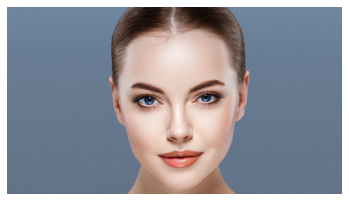

In [ ]:
plt.imshow(data[0,:,:,:])
plt.grid(False)
plt.axis("off")

### Zero padding
- Define method named zero_pad that performs specified number of zero padding on the input data.  
parameters: 
            data: the data on which padding is performed    
            pad:  the amount of padding around the data    
returns: 
            data_padded: the nd-array after padding  

In [ ]:
def zero_pad(data, pad):
    data_padded = np.pad(array = data, pad_width = ((0,0),(pad,pad), (pad,pad), (0,0)), mode = 'constant', constant_values = 0)
    return data_padded

- Run the below cell to add zero zero padding using the method define above.   
Expected output:
             [[0. 0. 0. 0.]
             [0. 0. 0. 0.]
             [0. 0. 1. 1.]
             [0. 0. 1. 1.]]

dimension before padding:  (1, 517, 926, 3)
dimension after padding:  (1, 537, 946, 3)
[[  0   0   0   0]
 [  0   0   0   0]
 [  0   0 135 135]
 [  0   0 135 135]]


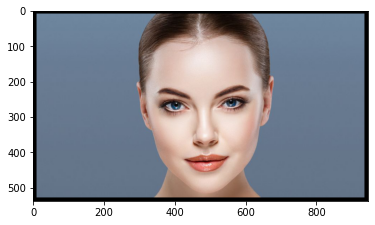

In [ ]:
print("dimension before padding: ", data.shape)
img_pad = zero_pad(data, 10)
print("dimension after padding: ", img_pad.shape)
print(img_pad[0,8:12,8:12,1])
plt.imshow(img_pad[0,:,:,:], cmap = "gray")
plt.grid(False)

output1 = np.mean(img_pad)

### Convolution single step  
Define the function named conv_single_step() to convolve a slice of input data using the specified filter  
parameter:  
         - data_slice: the receptive field over which convolution is performed  
         - W: the filter used for convolution  
         - b: the bias term  
returns:
         - Z: convolved output over the receptive field

In [ ]:
def conv_single_step(data_slice, W, b):
    conv = np.multiply(data_slice, W)
    Z = np.sum(conv) + b
    
    return Z

### Strided Convolution
Define method conv_forward to perform strided convolution on the input data.  
use conv_single_step() to perform the convolution at each stride.  
Parameters:  
        - data: input data on which convolution is performed  
        - W: the filter used for convolution operation  
        - b: the bias term  
        - hparams: dictionary defined by {"stride": s, "pad": p}  
returns:  
       - Z: the convolved output  

refer the code snippet provided in the course. 

In [ ]:
def conv_forward(A_prev, W, b, hparams):
    stride = hparams["stride"]
    pad = hparams["pad"]
    m, h_prev, w_prev, c_prev = A_prev.shape
    f, f, c_prev, n_c = W.shape
    n_h = int((h_prev - f + 2*pad)/stride) + 1
    n_w = int((w_prev - f + 2*pad)/stride) + 1
  
    Z = np.zeros((m, n_h, n_w, n_c))
    A_prev_pad = zero_pad(A_prev, pad)
    for i in range(m):
        for h in range(n_h):
              for w in range(n_w):
                    for c in range(n_c):
                        w_start = w * stride
                        w_end = w_start + f 
                        h_start = h * stride
                        h_end = h_start + f       
                        Z[i,h,w,c] = conv_single_step(A_prev_pad[i, h_start:h_end, w_start:w_end, :], W[:,:,:,c], b[:,:,:,c])
    return Z

- The below cell defines the test data for input as well as filter.  
- Run the cell to perfom the convolution operation using the method defined above.   
**Expected output: -0.008**

In [ ]:
np.random.seed(1)
input_ = np.random.randn(10, 4, 4, 3)
W = np.random.randn(2, 2, 3, 8)
b = np.random.randn(1, 1, 1, 8)
hparameters = {"pad" : 1,
               "stride": 1}

output_ = conv_forward(input_, W, b, hparameters)
print(np.mean(output_))

-0.007843400138348266


- Run the below cell to define edge_detect filter, the filter values for edge detection has been define for you

In [ ]:
edge_detect = np.array([[1,0,-1],[1,0,-1],[1,0,-1]]).reshape((3,3,1,1))

- Define a dictionary hparams with stride = 1 and pad = 0
- initialize bias parameter b to zero of dimension (1,1,1,1) hint: use np.zeros()
- Perform strided convolution using the method conv_forward() you defined previously.
  - pass edge_detect filter, bais b and hparams as parameters to perform convolution on the data variable defined previously.
  - assign the result to variable Z

dimension of image before convolution:  (1, 517, 926, 3)
dimension of image after convolution:  (1, 515, 924, 1)


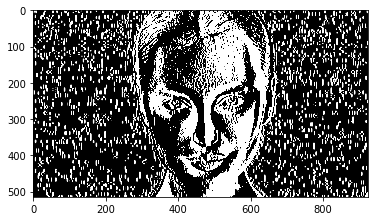

In [ ]:

hparams = {"pad" : 0,
           "stride": 1}
b = np.zeros((1, 1, 1, 1))
Z = conv_forward(data, edge_detect, b, hparams)


plt.clf()
plt.imshow(Z[0,:,:,0], cmap='gray',vmin=0, vmax=1)
plt.grid(False)
print("dimension of image before convolution: ", data.shape)
print("dimension of image after convolution: ", Z.shape)

output2 = np.mean(Z[0,100:200,200:300,0])

dimension of image before convolution:  (1, 517, 926, 3)
dimension of image after convolution:  (1, 515, 924, 1)


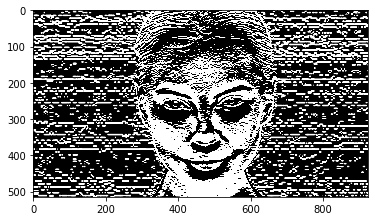

In [ ]:

##below are the filters for vetical as well as horizontal edge detection, try these filters once you have completed this handson.
vertical_filter = np.array([[1,  1,  1], [0,  0,  0], [-1, -1, -1]]).reshape(3,3,1,1)

Z = conv_forward(data, vertical_filter, b, hparams)
plt.clf()
plt.imshow(Z[0,:,:,0], cmap='gray',vmin=0, vmax=1)
plt.grid(False)
print("dimension of image before convolution: ", data.shape)
print("dimension of image after convolution: ", Z.shape)

dimension of image before convolution:  (1, 517, 926, 3)
dimension of image after convolution:  (1, 515, 924, 1)


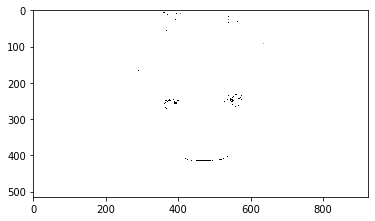

In [ ]:
##below are the filters for sharping as well as horizontal edge detection, try these filters once you have completed this handson.

sharping_filter = np.array([[-1, -1, -1],[-1, 9, -1], [-1, -1, -1]]).reshape((3,3,1,1))
Z = conv_forward(data, sharping_filter, b, hparams)
plt.clf()
plt.imshow(Z[0,:,:,0], cmap='gray',vmin=0, vmax=1)
plt.grid(False)
print("dimension of image before convolution: ", data.shape)
print("dimension of image after convolution: ", Z.shape)

### Max pooling
Define method max_pool to perform max pooling on the input data.  
Parameters:  
        - data: input data on which convolution is performed  
        - hparams: dictionary defined by {"f": f, "stride": s} , f is the filter size and s is the number of strides returns:  
       - output: output after pooling 

refer the code snippet provided in the course.  

In [ ]:
def max_pool(input, hparam):
    m, h_prev, w_prev, c_prev = input.shape
    f = hparam["f"]  ## f is the filter size to use for pooling
    stride = hparam["stride"]
    h_out = int(((h_prev - f)/stride) + 1)
    w_out = int(((w_prev -f)/stride) + 1)
    output = np.zeros((m, h_out, w_out, c_prev))
    for i in range(m):
        for c in range(c_prev):
            for h in range(h_out):
                for w in range(w_out):
                    w_start = w * stride
                    w_end = w_start + f
                    h_start = h * stride
                    h_end = h_start + f
                    output[i, h, w, c] = np.max(input[i,h_start:h_end, w_start:w_end, c])
    print(output.shape)
    assert output.shape == (m, h_out, w_out, c_prev)
    return output

- Run the below cell to test the method you define above.  
Expected output: **1.075**

In [ ]:
pool_params = {"stride" : 2, "f" : 2}
output_ = max_pool(input_, pool_params)
print(np.mean(output_))

(10, 2, 2, 3)
1.0753012177728354


- Define pooling parameters "stride" and filter size "f" as a dictionary named **hparams** with stride = 1 and f = 2
- call the method max_pool with parameters Z (the convolved output) and hparams 

(10, 3, 3, 3)
dimension before pooling : (1, 515, 924, 1)
dimension after pooling : (10, 3, 3, 3)


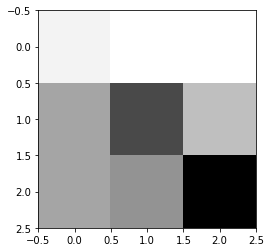

In [ ]:
###start code
hparams = {'stride':1, 'f':2}
Z_pool =  max_pool(input_, hparams)
###End code

print("dimension before pooling :", Z.shape)
print("dimension after pooling :", Z_pool.shape)

plt.imshow(Z_pool[0,:,:,0], cmap = "gray")

with open("output.txt", "w+") as file:
    file.write("output1 = %f" %output1)
    file.write("\noutput2 = %f" %output2)

# Question 3

Please describe at least one real world significance of the following concepts in linear algebra:

a.	Eigen Values and Eigen Vectors

b.	Laplacian

c.	Positive Definite and Positive Semi-Definite Matrices

## Eigen Values and Eigen Vectors

### <u> Eigenvector </u>
Every vector (list of numbers) has a direction when it is plotted on XY chart. Eigenvectors are those vectors when a linear transformation (such as multiplying it to a scalar) is performed on them, their direction does not change.



### <u>Eigenvalue</u> 
The scalar that is used to transform (stretch/compress) an Eigenvector.
    
Eigenvectors and eigenvalues are used to reduce noise in data. They can help us improve efficiency in computationally intensive tasks. They also eliminate features that have a strong correlation between them and also help in reducing over-fitting.



### <u>Use case - Eigenvalues and Eigenvectors</u>

When we are building forecasting models that are trained on images, sound and/or textual contents then the input feature sets can end up having a large set of features. It is also difficult to understand and visualize data with more than 3 dimensions. As a result, we often use one-hot encoding to transform values in textual features to separate numerical columns which can end up taking a large amount of space on a disk. Component analysis is one of the key strategies that is utilised to reduce dimension space without losing valuable information. <b> The core of component analysis (PCA) is built on the concept of eigenvalues and eigenvectors. </b>

Eigenvalues and Eigenvectors have their importance in linear differential equations where we want to find a rate of change or when we want to maintain relationships between two variables.

Additionally, eigenvectors and eigenvalues are used in facial recognition techniques such as EigenFaces.

Occasionally we gather data that contains a large amount of noise. Finding important or meaningful patterns within the data can be extremely difficult. Eigenvectors and eigenvalues can be used to construct spectral clustering.

We can also use eigenvector to rank items in a dataset.

Lastly, in non-linear motion dynamics, eigenvalues and eigenvectors can be used to help us understand the data better as they can be used to transform and represent data into manageable sets.

<i>Eigenvalues and Eigenvectors provides Summary of a large matrix</i>



### For example
Eigenvectors make understanding linear transformations easy. They are the "axes" (directions) along which a linear transformation acts simply by "stretching/compressing" and/or "flipping"; eigenvalues give you the factors by which this compression occurs.

Illustration of a transformation (of Mona Lisa): The image is changed in such a way that the red arrow (vector) does not change its direction, but the blue one does. The red vector therefore is an eigenvector of this transformation, the blue one is not. Since the red vector does not change its length, its eigenvalue is 1. The transformation used is called shear mapping.

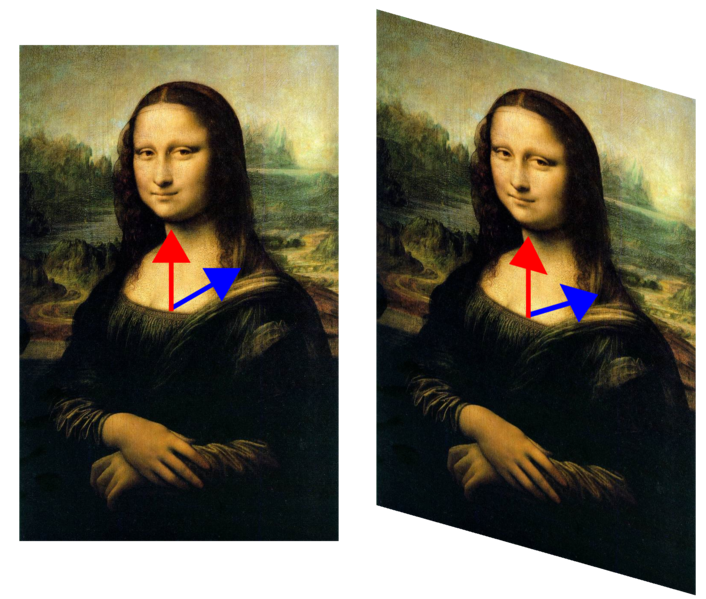

In [ ]:
from IPython.display import Image
Image(filename='Mona_Lisa_with_eigenvector.png', width=500) 

### Calculate Eigenvalues and Eigenvectors In Python

In [ ]:
# numpy.linalg.eig module takes in a square matrix as the input and returns eigen values and eigen vectors.
# It also raises an LinAlgError if the eigenvalue computation does not converge.

import numpy as np
from numpy import linalg as LA

input = np.array([[2,-1],[4,3]])

eigenvalue, eigenvector =  LA.eig(input)

In [ ]:
eigenvalue

array([2.5+1.93649167j, 2.5-1.93649167j])

In [ ]:
eigenvector

array([[-0.1118034 +0.4330127j, -0.1118034 -0.4330127j],
       [ 0.89442719+0.j       ,  0.89442719-0.j       ]])

## Laplacian

In the mathematical field of graph theory, the Laplacian matrix, also called the graph Laplacian, admittance matrix, Kirchhoff matrix or discrete Laplacian, is a matrix representation of a graph. Named after Pierre-Simon Laplace, the graph Laplacian matrix can be viewed as a matrix form of the negative discrete Laplace operator on a graph approximating the negative continuous Laplacian obtained by the finite difference method.

Common in applications graphs with weighted edges are conveniently defined by their adjacency matrixes where values of the entrees are numeric and no longer limited to zeros and ones. In spectral clustering and graph-based signal processing, where graph vertices represent data points, the edge weights can be computed, e.g., as inversely proportional to the distances between pairs of data points, leading to all weights being non-negative with larger values informally corresponding to more similar pairs of data points. Using correlation and anti-correlation between the data points naturally leads to both positive and negative weights. Most definitions for simple graphs are trivially extended to the standard case of non-negative weights, while negative weights require more attention, especially in normalization.


### Example

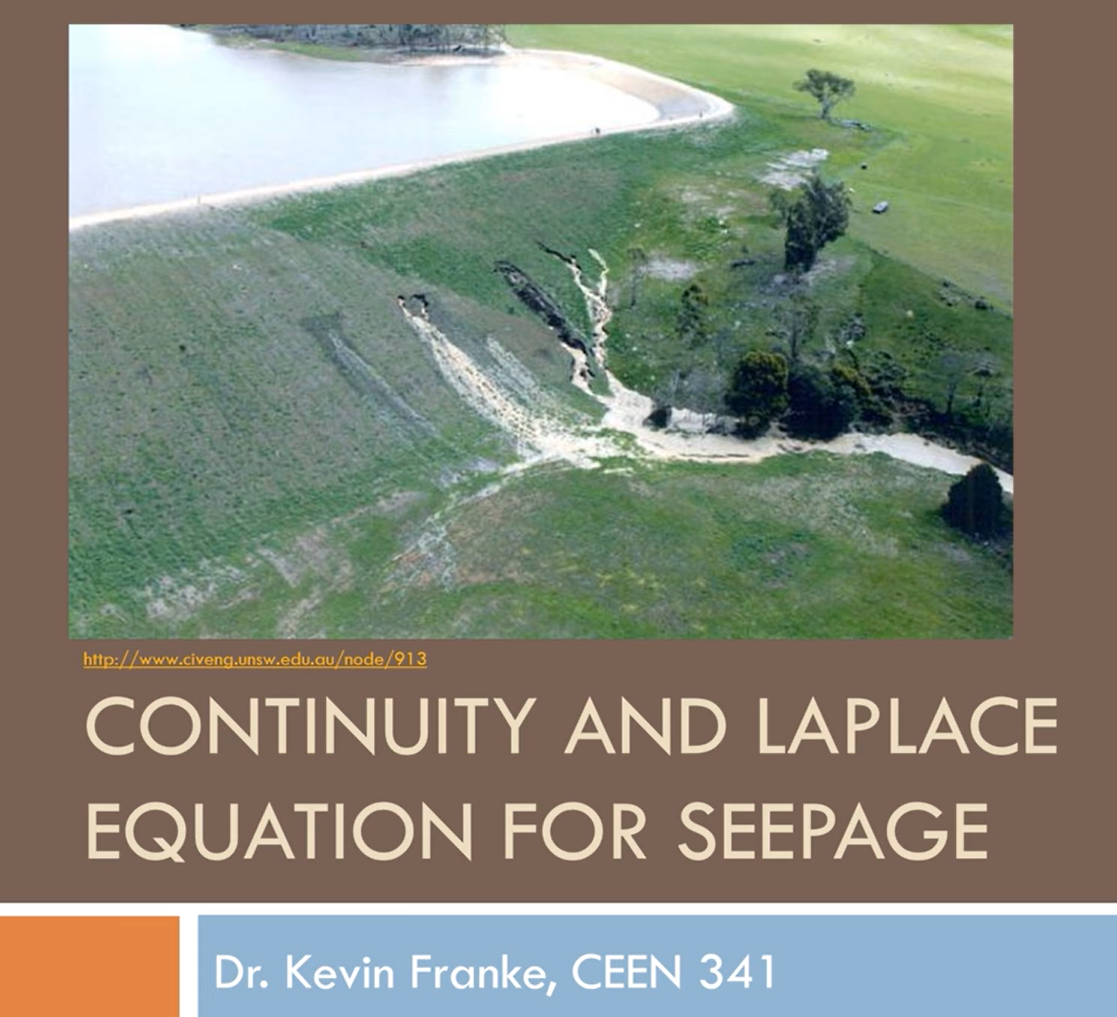

In [ ]:
from IPython.display import Image
Image(filename='laplace.png', width=500) 

In [ ]:
import numpy as np
from scipy.sparse.csgraph import laplacian

g = np.array([[1, 0, 0, 0],
              [0, 1, 0, 1],
              [0, 0, 0, 1],
              [0, 1, 1, 1]])

print("Matrix G:\n", g)
print("Laplacian matrix:\n",laplacian(g))

Matrix G:
 [[1 0 0 0]
 [0 1 0 1]
 [0 0 0 1]
 [0 1 1 1]]
Laplacian matrix:
 [[ 0  0  0  0]
 [ 0  1  0 -1]
 [ 0  0  1 -1]
 [ 0 -1 -1  2]]


## Positive Definite and Positive Semi-Definite Matrices

### Positive Definite Matrix


In mathematics, a symmetric matrix $M$ with real entries is positive-definite if the real number $ z^{\textsf {T}}Mz$ is positive for every nonzero real column vector $ z,$  where $ z^{\textsf {T}}$ is the transpose of $ z$. More generally, a Hermitian matrix (that is, a complex matrix equal to its conjugate transpose) is **positive-definite** if the real number $ z^{*}Mz$ is positive for every nonzero complex column vector $z$, where $z^{*}$ denotes the conjugate transpose of $z$.



An $n\times n$ symmetric real matrix $M$ is said to be positive-definite if $\mathbf {x} ^{\textsf {T}}M\mathbf {x} >0$ for all non-zero ${\mathbf {x}  \in  \mathbb {R} ^{n}}$. Formally,



### Positive Semi-Definite Matrix

Positive semi-definite matrices are defined similarly, except that the scalars $ z^{\textsf {T}}Mz$ and $ z^{*}Mz$ are required to be positive or zero (that is nonnegative). Negative-definite and negative semi-definite matrices are defined analogously. A matrix that is not positive semi-definite and not negative semi-definite is sometimes called indefinite.

An $n\times n$ symmetric real matrix $M$ is said to be positive-semidefinite or non-negative-definite if $ \mathbf {x} ^{\textsf {T}}M\mathbf {x} \geq 0$ for all $\mathbf {x}  \in  \mathbb {R} ^{n}$. Formally,

***Positive definite and Positive Semi definite matrices*** are of both theoretical and computational importance in a wide variety of applications. They are used, for example, <i>in optimization algorithms and in the construction of various linear regression <i>


### Example

In [ ]:
!pip install numpy 

import numpy as np

n_size=4
a = np.random.rand(n_size)
A_PSD = np.outer(a,a)  # the outer product of any vector generates a PSD matrix
A_PD = A_PSD+np.identity(n_size) # little trick I found for PS matrix



In [ ]:
print(" Positive semi-definite matrix\n",A_PSD)


 Positive semi-definite matrix
 [[0.86090375 0.83132483 0.45607967 0.79489055]
 [0.83132483 0.80276218 0.44040969 0.76757971]
 [0.45607967 0.44040969 0.24161663 0.42110796]
 [0.79489055 0.76757971 0.42110796 0.73393917]]


In [ ]:
print(" Positive definite matrix\n",A_PD)

 Positive definite matrix
 [[1.86090375 0.83132483 0.45607967 0.79489055]
 [0.83132483 1.80276218 0.44040969 0.76757971]
 [0.45607967 0.44040969 1.24161663 0.42110796]
 [0.79489055 0.76757971 0.42110796 1.73393917]]


# Question 4

Create a MxN matrix of English alphabets where M and N could be large numbers (may in 100s or 1000s) and write an optimized function that could find meaningful words (words in English vocabulary) from this matrix of letters, arranged vertically, horizontally or diagonally (like in a crossword puzzle).

## Install the dependencies

In [ ]:
#english_words_set is the set of english words which will be considered to find the right word in the puzzle
!pip install english_words
!pip install termcolor
from english_words import english_words_set

import numpy as np
import string
import random
from termcolor import colored
import pandas as pd
import csv
import os

     |████████████████████████████████| 1.1 MB 4.3 MB/s 
  Created wheel for english-words: filename=english_words-1.1.0-py3-none-any.whl size=1106680 sha256=485e8372ef59f31d4f7dbac8ac18c4ada2577fe6791dc735c932abada0eaa672
  Stored in directory: /root/.cache/pip/wheels/25/3d/4c/12a119ce90b46b4f90f9ddf41d719ecabb40faec6103379fc8
Successfully built english-words


## Generate the Puzzle Board

In [ ]:
class GeneratePuzzleBoard:
    #This class generates the dataset 
    def __init__(self, dataset):      
        #:param: dataset: the considered dataset (dataframe)
        self.seed = 173
        self._dataset = dataset
    def set_dataset(self,width, length):
        #:param: width: width of dataset (int)
        #:param: length: the length of dataset (int)
        if int(width) <=0 or int(length)<=0: 
            print("Canot generate the puzzle board")
        else:
            shape = width * length
            alpha=list(string.ascii_lowercase)
            characters = []
            for x in range(shape):
                choice = random.choice(alpha)
                characters.append(choice)
            self._dataset = np.array(characters).reshape(width, length)

        
    def get_dataset(self):
        return self._dataset

## Find the right words in the given puzzle board

In [ ]:
class Puzzle:
    #This class finds the right word in the board    
    def __init__(self, path_of_puzzle, path_of_words):
        #:param: path_of_puzzle: the path of csv file contains the puzzle (string)
        #:param: path_of_words: the path of csv file contains the given words (string)
        if os.path.exists(path_of_puzzle) or os.path.exists(path_of_words):
            
            self.puzzle = self.parse_puzzle(path_of_puzzle)
            self.words = self.parse_words(path_of_words)
            self.solved = []
            self.size = len(self.puzzle)
        else:
            print("Oops! Some thing wrong, please check the input of file puzzle, list of word")
        

    def parse_puzzle(self, puzzle_name):
        puzzle = []
        with open(puzzle_name, 'r') as pfile:
            p_reader = csv.reader(pfile)
            for p_row in p_reader:
                puzzle.append(p_row)
        return puzzle
    
    def parse_words(self, list_name):
        words = []
        with open(list_name, 'r') as cfile:
            c_reader = csv.reader(cfile)
            for c_row in c_reader:
                words.append(str(c_row[0]).replace(' ', '')) 
        return words 

    def output_cli(self):
        for ri, row in enumerate(self.puzzle):
            for chi, ch in enumerate(row[0]):
                if (ri, chi) in self.solved:
                    print(colored(f"{ch}", "red"),end=" ")
                else:
                    print(colored(f"{ch}", "blue"),end=" ")
            print()

    def find_word(self):
        for word in self.words:
            if self.find_horizontal(word):
                continue
            if self.find_vertical(word):
                continue
            if self.find_diagonal(word):
                continue

    def find_horizontal(self, word):
        for ri, row in enumerate(self.puzzle):
            if word in str(row):
                for i in range(0, len(word)):
                    self.solved.append((ri, str(row).find(word) - 2 + i))
                return True
            row_r = str(row)[::-1]
            if word in row_r:
                for i in range(0, len(word)):
                    self.solved.append((ri, len(row_r) - str(row_r).find(word) - 3 - i))
                return True
        return False

    def find_vertical(self, word):
        for char in range(len(self.puzzle[0][0])):
            temp = []
            for col in range(len(self.puzzle)):
                temp.append(self.puzzle[col][0][char])
            temp = ''.join(temp)
            temp_r = temp[::-1]
            if word in str(temp):
                for i in range(0, len(word)):
                    self.solved.append((str(temp).find(word) + i, char))
                return True
            if word in str(temp_r):
                for i in range(0, len(word)):
                    self.solved.append((len(temp_r) - str(temp_r).find(word) - 1 - i, char))
                return True
        return False

    def find_diagonal(self, word):
        for a in range(0, len(self.puzzle[0][0])):
            temp = [[] for i in range(8)]
            ranges = [[] for i in range(8)]
            i = 0
            while ((a - i) >= 0) and (i < len(self.puzzle)):
                coords = [[i, a-i],[self.size-1-i, a-i], [self.size-1-i, self.size-1-(a-i)], [i, self.size-1-(a-i)]]
                for cx, c in enumerate(coords):
                    temp[cx].append(self.puzzle[c[0]][0][c[1]])
                    ranges[cx].append((c[0], c[1]))
                    ranges[cx+4].append((c[1], c[0]))
                i+=1

            for ti in range(4):
                temp[ti] = ''.join(temp[ti])
                temp[ti+4] = temp[ti][::-1]

            for tx, t in enumerate(temp):
                if word in str(t):
                    for i in range(0, len(word)):
                        self.solved.append(ranges[tx][str(t).find(word) + i])
                    return True
        return False

## Visualization experiment

To make the example more intuitive, let's start with the small puzzle board (30x30) 

In [ ]:
width = 30
length = 30
generated_puzzle_board = GeneratePuzzleBoard(dataset=np.empty([width, length]))
generated_puzzle_board.set_dataset(width, length)
board = generated_puzzle_board._dataset

puzzle_board = []
for b in board:
    puzzle_board.append(''.join(str(x) for x in list(b)))

In [ ]:
puzzle_board

['eqnwdvjhgoqxxdeisipqdmkacohgjr',
 'jdhmmldijiqlpuakeujlkhcuxqiezj',
 'oiqrqzgygnmuozvvtvwfvnkknaynqa',
 'zuplfemjqftjhssvudvfahmqpheqma',
 'dtbdhcjuioshcboywzskmtezpqxmkf',
 'nbuqgwsmzoidaqckfgfdsizwtneuzc',
 'kjzwdasjpjawcqbyvruwvaglzkbhnv',
 'sihucpgxisenortekcfqgmgyoqubzu',
 'yylcptlipuwybjlrbbqaerrrmlxrqn',
 'hhrklvmrddjgkytmlhnrbtvjbbzyes',
 'gqhstimpuigiklvjqiihdamlqqjsmr',
 'vragqncaabdvtuesnhvopmynweptcm',
 'goboaywwoztqjhcmsrnrdcsxfecvyb',
 'mdavcerayicrhargevgtvyyijggilc',
 'qstvbgyqfwclyqdurbjnoiskfypdtw',
 'dvywbjbbfnnsfzhmoecvirwyewybds',
 'tbiixucvxmjopbvhipbchikjhrxpxa',
 'mlpyjvhyoveurlaflnashsfnhpeggm',
 'tztlohlwctnizyxhgrgqnvrpnxdobh',
 'bmbvmilardijfilxvpfyjbrrwauygc',
 'vceqysjulxwusoqjdgbvrlfgrpenki',
 'zzgtrnwhofxjmfdmmiwkvxrjzypofn',
 'qllujrdjvtewgxifrmpyspbdlupyux',
 'zxirjkqcpdmuojsmtuadxnwckvocai',
 'tomfyqmmfoajwpybczqahlwtnteufm',
 'lrmsuxmkmkgpaoxqlvnzuypbuipqsl',
 'zuvhkmqczpycsuixyqquedwpjnccow',
 'rqkimtnzxksrwmsnonistiupwfslke',
 'qbipzuwtlkexhvtbsu

Save the board to the csv file (to avoid the confusion, the default board already save as "board.csv")

In [ ]:
pd.DataFrame(puzzle_board).to_csv("board_new.csv",header=False, index=False)

To make the obvious result without reducing the performance of algorithm, the 
list_of_word is given as


In [ ]:
list_of_word = ['cow', 'zoo','soy','led'] 
pd.DataFrame(list_of_word).to_csv("list_of_word.csv",header=False, index=False)

In [ ]:
!ls


bg.png	       laplace.png		       output.txt
board_big.csv  list_of_english_word.csv        Report_DoDungVu.ipynb
board.csv      list_of_word.csv		       test_image.jpg
board_new.csv  Mona_Lisa_with_eigenvector.png  test_report.pdf


In [ ]:
p = Puzzle(path_of_puzzle='board.csv', path_of_words='list_of_word.csv')
print("\nPROBLEM:")
p.output_cli()
print("\nSOLUTION:")
p.find_word()
p.output_cli()


PROBLEM:
v r l c j k p e a u g q n m t t o y q a d y r r q p z k y h 
i z f f c s m a c s l f t g n l l l x c b g b n n e i b m s 
a q s e m l j h g a b y l w g w d u g e x f f u o y k l i t 
n y w k k s a f w d a o y l v a h p y d i x n k s o y j c p 
n a l v v t p o y b x i m b c n r l i a j x m d o j h c u j 
r v u h u l q o h i c t i i v e v a o a b u f x b h q n u x 
c h s j t i k n t z e j c s j l z b m q f g g p u m e p a j 
x g a s v g y t o r j p e u a f p e b i h r y l q v z v b d 
w j w k f d l t j v g a e v e p q v w u t g f s j a m x g b 
z w n b a p e j q k f f s i s c t s q n x b f o b r p w p y 
x v o o a h d t v g e l c l j c u d k m t b t t m d t k e e 
i o q o b k c d e s d u n s n o z u z f l m s t w w l j c j 
z d z t r k j e m i b v b p c k o m z c n n p b g e f l o c 
y t y d h t k k l a t l e a m m e f z l k g f r q j u c k t 
r c v z w j x w g x q n e c s z b j f m d i q y p w z h l d 
k p q o p q j a v x i d k g e u r f e c i n b a t h z v q g 
x d l d k l m 

The found word will be represented by  $\color{red}{\text{red}}$  color

Let's turn to the general prolem:

The Puzzle board size is big (100x100), or (1000x1000) The List_of_word from the dictionary (english_words_set)

By considering the english_words_set, all the english words will be found on the puzzle (the size puzzle board is 30x30)

In [ ]:
list_of_english_word = list(english_words_set)
pd.DataFrame(list_of_english_word).to_csv("list_of_english_word.csv",header=False, index=False)


In [ ]:
list_of_english_word

['payoff',
 'sybarite',
 'tousle',
 'tyrannicide',
 'regiment',
 'bacillus',
 'id',
 'single',
 'bitterroot',
 'Durkin',
 'Washington',
 'hectic',
 'warehousemen',
 'celebrate',
 'inherit',
 'sequitur',
 'Shenandoah',
 'quack',
 'originate',
 'Thruway',
 'holler',
 'erotic',
 'contestant',
 'come',
 'auspices',
 'Dunham',
 'scarf',
 'divalent',
 'flew',
 'mutandis',
 'lawrencium',
 'mallow',
 'codex',
 'softwood',
 'inability',
 'lunchtime',
 'Rockland',
 'snarl',
 'McCarty',
 'transport',
 'herein',
 'bricklayer',
 'Elisha',
 'Sacramento',
 'Barry',
 'peg',
 'wheat',
 'totalitarian',
 'wreck',
 'Austria',
 'debtor',
 'desiderata',
 'hangman',
 'sulfur',
 'propelling',
 'typewrite',
 'choosy',
 'dogmatic',
 'emacs',
 'catastrophic',
 'Winchester',
 'deviant',
 'predict',
 'boyar',
 'harbinger',
 'scaly',
 'bleat',
 'omnipotent',
 'hundredfold',
 'spouse',
 'compel',
 'almanac',
 'barrier',
 'hovel',
 'sunder',
 'nest',
 'omitting',
 'billionth',
 'cation',
 'farcical',
 'Dearborn',
 'c

In [ ]:
p = Puzzle(path_of_puzzle='board.csv', path_of_words='list_of_english_word.csv')
print("\nPROBLEM:")
p.output_cli()
print("\nSOLUTION:")
p.find_word()
p.output_cli()


PROBLEM:
v r l c j k p e a u g q n m t t o y q a d y r r q p z k y h 
i z f f c s m a c s l f t g n l l l x c b g b n n e i b m s 
a q s e m l j h g a b y l w g w d u g e x f f u o y k l i t 
n y w k k s a f w d a o y l v a h p y d i x n k s o y j c p 
n a l v v t p o y b x i m b c n r l i a j x m d o j h c u j 
r v u h u l q o h i c t i i v e v a o a b u f x b h q n u x 
c h s j t i k n t z e j c s j l z b m q f g g p u m e p a j 
x g a s v g y t o r j p e u a f p e b i h r y l q v z v b d 
w j w k f d l t j v g a e v e p q v w u t g f s j a m x g b 
z w n b a p e j q k f f s i s c t s q n x b f o b r p w p y 
x v o o a h d t v g e l c l j c u d k m t b t t m d t k e e 
i o q o b k c d e s d u n s n o z u z f l m s t w w l j c j 
z d z t r k j e m i b v b p c k o m z c n n p b g e f l o c 
y t y d h t k k l a t l e a m m e f z l k g f r q j u c k t 
r c v z w j x w g x q n e c s z b j f m d i q y p w z h l d 
k p q o p q j a v x i d k g e u r f e c i n b a t h z v q g 
x d l d k l m 

Note: There are too many english words from english word set, so they are might overlapped

Work with Board big (MxN = 100x100)

In [ ]:
width = 100
length = 100
generated_puzzle_board = GeneratePuzzleBoard(dataset=np.empty([width, length]))
generated_puzzle_board.set_dataset(width, length)
board = generated_puzzle_board._dataset
puzzle_board = []
for b in board:
    puzzle_board.append(''.join(str(x) for x in list(b)))
pd.DataFrame(puzzle_board).to_csv("board_big.csv",header=False, index=False)

In [ ]:
p = Puzzle(path_of_puzzle='board_big.csv', path_of_words='list_of_word.csv')
print("\nPROBLEM:")
p.output_cli()
print("\nSOLUTION:")
p.find_word()
p.output_cli()


PROBLEM:
z h h y g f e c z w y s z k r t m r e k z j p j r h c u z j j f e w g p p g o m d h h b e g q h c f o n l d d e y u g a g c y n k s d g z b q i q w e x a f c b y u i d o o c q k v t p a l g g o f x e 
f q l m h w f h w j l r h y s x k l h k j z u a j e d a g q r i r w z v s c f l l s f z i g c f u a t f a x k k y u l b d v i t n b s a o y a t p k m m h l g q c u f f o n e y d c d e i v j h h r h j 
o c g o z m l w k h w v t g l s g h y c o r k j k d c p s q x l h y g q q g u g n r k o o q v p g i s v r b m y d t y d m a d c p u f l k m l w l e p f v a r a r w r j n h v g d l m j f v k d x f p k 
g l d x j l c v a n i d n t n n o x z l r e f o m x n v a h u w f b v p g k f w j a u w y f y v k w p a c q l t x w r b c a l v x f d r d p l r g i b q k t g d g k u r a i v h d j b e n e b r k q g a 
v w a n y q q g a d o m q t f a k z k g o n r g d s m y v p j j f y b q u t c o j b e q q o c u v l l f x t n j t x v q k e o k s w w y r x a b p r i c p x w c j f i r j y v t c v g q u 

In [ ]:
p = Puzzle(path_of_puzzle='board_big.csv', path_of_words='list_of_english_word.csv')
print("\nPROBLEM:")
p.output_cli()
print("\nSOLUTION:")
p.find_word()
p.output_cli()


PROBLEM:
z h h y g f e c z w y s z k r t m r e k z j p j r h c u z j j f e w g p p g o m d h h b e g q h c f o n l d d e y u g a g c y n k s d g z b q i q w e x a f c b y u i d o o c q k v t p a l g g o f x e 
f q l m h w f h w j l r h y s x k l h k j z u a j e d a g q r i r w z v s c f l l s f z i g c f u a t f a x k k y u l b d v i t n b s a o y a t p k m m h l g q c u f f o n e y d c d e i v j h h r h j 
o c g o z m l w k h w v t g l s g h y c o r k j k d c p s q x l h y g q q g u g n r k o o q v p g i s v r b m y d t y d m a d c p u f l k m l w l e p f v a r a r w r j n h v g d l m j f v k d x f p k 
g l d x j l c v a n i d n t n n o x z l r e f o m x n v a h u w f b v p g k f w j a u w y f y v k w p a c q l t x w r b c a l v x f d r d p l r g i b q k t g d g k u r a i v h d j b e n e b r k q g a 
v w a n y q q g a d o m q t f a k z k g o n r g d s m y v p j j f y b q u t c o j b e q q o c u v l l f x t n j t x v q k e o k s w w y r x a b p r i c p x w c j f i r j y v t c v g q u 

# Question 5
Create a dataset with 4 numeric features and 2000 sample points. Perform K-means clustering from scratch without using any pre-built functions for k means clustering from packages such as sklearn. (You could choose k of your choice).  Please provide a well-commented code for this. 

## Install dependencies

In [ ]:
# Linear algebra
import numpy as np 
# Needed for plotting
import matplotlib.colors
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import random

from sklearn.decomposition import PCA

from scipy.spatial import distance

import pandas as pd

## K-Means Clustering
1. Choose the number of clusters K
2. Select K random points from the data as centroid
3. Assign each data point to the closet cluster centroid
4. Recompute the centroid of newly formed clusters
5. Repeat  steps 3 and 4 untill convergence

In [ ]:
class K_Means:
    #This class implements the K-means algorithm from scratch
    def __init__(self, k=3, max_iterations = 500):
        #:param: k: the number of K (int)
        #:param: max_iterations: the max interation of algorithm (int), to save time, get the default value is 500
        self.k = k
        self.max_iterations = max_iterations
    
    def euclidean_distance(self, point1, point2):
        #Compute the euclidean_distance between point1, point2
        #:param: point 1: the point 1 (array)
        #:param: point 2: the point 2 (array)
        return distance.euclidean(point1, point2)
        
    def fit(self, data):
        
        #let the first K points from the dataset be the initial centroids
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data[i]
        
        #start K-Mean clustering
        for i in range(self.max_iterations):
            #create classifications the size of K
            self.classes = {}
            for j in range(self.k):
                self.classes[j] = []#empty them
                
            #find the distance between the points and the centroids
            for point in data:
                distances = []
                for index in self.centroids:
                    distances.append(self.euclidean_distance(point,self.centroids[index]))
                
                #find which cluster the datapoint belongs to by finding the minimum
                #ex: if distances are 2.03,1.04,5.6,1.05 then point belongs to cluster 1 (zero index)
                cluster_index = distances.index(min(distances))
                self.classes[cluster_index].append(point)
                
            #now that we have classified the datapoints into clusters, we need to again 
            #find new centroid by taking the centroid of the points in the cluster class
            for cluster_index in self.classes:
                self.centroids[cluster_index] = np.average(self.classes[cluster_index], axis = 0)

## Data Generating
1. Set the value of number features
2. Set the value of number samples
3. Randomly generate data


In [ ]:
class GenerateDataset:
    #This class generates the dataset 
    def __init__(self, dataset):      
        #:param: dataset: the considered dataset (dataframe)
        self.seed = 173
        self._dataset = dataset
    def set_dataset(self,number_of_features, sample_points):
        #:param: number_of_features: the number of features in the dataset (int)
        #:param: sample_points: the size of dataset (int)
        self._dataset = pd.DataFrame(np.random.rand(number_of_features, sample_points).T)
        
    def get_dataset(self):
        return self._dataset

Get the dataset


In [ ]:
generate_data = GenerateDataset(dataset = pd.DataFrame())
generate_data.set_dataset(4,2000)
data = generate_data.get_dataset()

The dataset

In [ ]:
data


,0,1,2,3
0,0.418578,0.086679,0.206512,0.509112
1,0.683465,0.193000,0.800153,0.799881
2,0.397991,0.275193,0.795308,0.630958
3,0.505742,0.738412,0.799091,0.019691
4,0.189552,0.859373,0.316803,0.329981
...,...,...,...,...
1995,0.866988,0.519735,0.321201,0.975541
1996,0.674607,0.353288,0.706248,0.830425
1997,0.176276,0.545247,0.917825,0.215979
1998,0.936308,0.889753,0.073071,0.448424


## Principal component analysis (PCA)

Using the PCA methodology to visualize the dataset and training the model as following:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


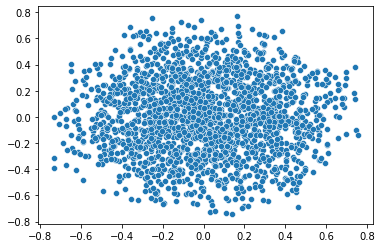

In [ ]:
pca = PCA(2) 
#Transform the data
df = pca.fit_transform(data)
sns.scatterplot(df[:,0], df[:, 1])

### Setup the Kmean object with K=5 and train with the PCA 

In [ ]:
kmean = K_Means(5) #K = 5

In [ ]:
#train model with the PCA dataframe and present it with 2D plot
kmean.fit(df)

Define the color of each cluster

In [ ]:
colors = 10*["r", "g", "c", "y", "m"]
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

### Present model with 2D plot

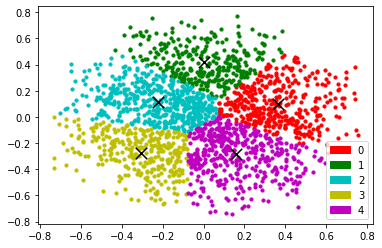

In [ ]:
#Getting the Centroids
centroids = kmean.centroids
fig, ax = plt.subplots()

# plotting the results:
 
for cluster_index in kmean.classes:
    color = colors[cluster_index]
    for features in kmean.classes[cluster_index]:
        ax.scatter(features[0], features[1], color = color,s = 10)
for centroid in kmean.centroids:
    ax.scatter(kmean.centroids[centroid][0], kmean.centroids[centroid][1], s = 130, marker = "x", color= "k")
red_patch = mpatches.Patch(color='r', label='0')
green_patch = mpatches.Patch(color='g', label='1')
cyan_patch = mpatches.Patch(color='c', label='2')
yellow_patch = mpatches.Patch(color='y', label='3')
pink_patch = mpatches.Patch(color='m', label='4')


plt.legend(handles=[red_patch, green_patch, cyan_patch, yellow_patch,pink_patch])

plt.show()



## Train the model with whole dataset (4 features)

In [ ]:
kmean.fit(data.to_numpy())

### Present model with 3D plot

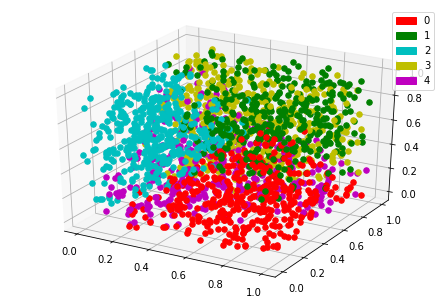

In [ ]:

colors = 10*["r", "g", "c", "y", "m"]
fig=plt.figure()
ax=Axes3D(fig)


for cluster_index in kmean.classes:
    color = colors[cluster_index]
    for features in kmean.classes[cluster_index]:
        ax.scatter(features[0], features[1], features[2],color = color,s = 30)

red_patch = mpatches.Patch(color='r', label='0')
green_patch = mpatches.Patch(color='g', label='1')
cyan_patch = mpatches.Patch(color='c', label='2')
yellow_patch = mpatches.Patch(color='y', label='3')
pink_patch = mpatches.Patch(color='m', label='4')

plt.legend(handles=[red_patch, green_patch, cyan_patch, yellow_patch,pink_patch])

plt.show()